In [25]:
import mlflow, pandas as pd
from prophet import Prophet

In [2]:
mlflow.start_run(run_name="prophet_forecast")

<ActiveRun: >

In [6]:
model = Prophet()

In [7]:
# Suivre les paramètres du modèle
mlflow.log_param("changepoint_prior_scale", model.changepoint_prior_scale)
mlflow.log_param("seasonality_prior_scale", model.seasonality_prior_scale)
# Ajoutez d'autres paramètres si nécessaire

10.0

In [6]:
model = Prophet()

In [16]:
data = pd.read_csv('../Data/gold_price_data.csv')

In [17]:
data = data.rename(columns={'Date': 'ds', 'Value': 'y'})

In [18]:
model.fit(data)

10:01:01 - cmdstanpy - INFO - Chain [1] start processing
10:01:09 - cmdstanpy - INFO - Chain [1] done processing


/home/utilisateur/miniconda3/envs/timeseries/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/utilisateur/miniconda3/envs/timeseries/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


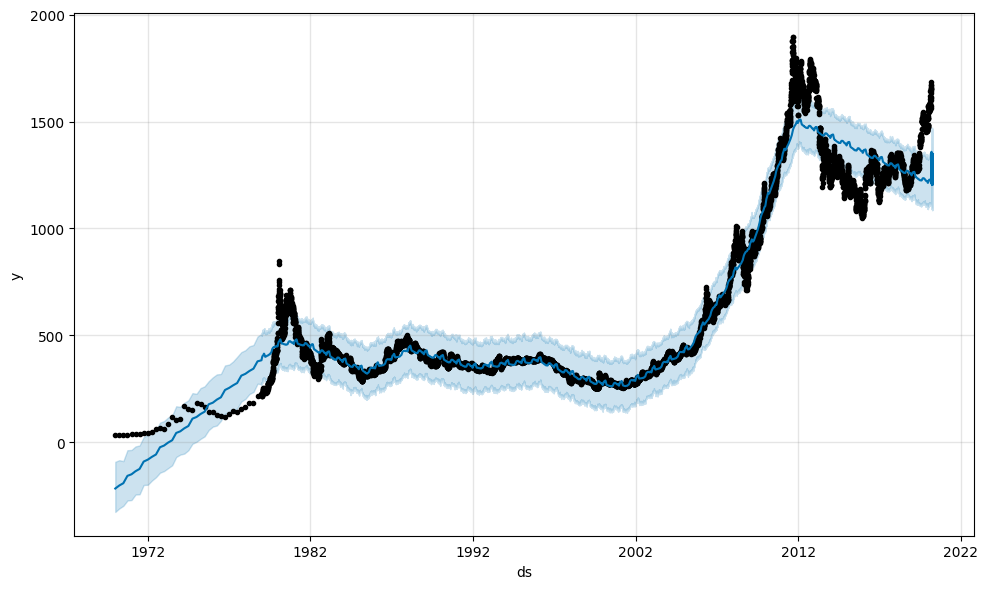

In [24]:
future = model.make_future_dataframe(periods=30)  # Prévision pour un an
forecast = model.predict(future)

# Afficher les prévisions
fig = model.plot(forecast)